In [2]:
import numpy as np
rot=lambda theta:[[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]
r=rot(np.pi/3)
r

[[0.5000000000000001, -0.8660254037844386],
 [0.8660254037844386, 0.5000000000000001]]

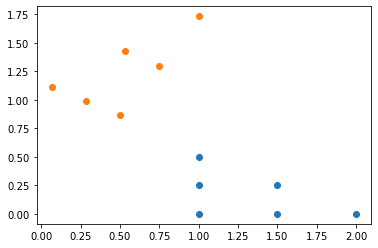

In [8]:
#create a list of 2-D points
points=np.array([[1,0],[1.5,0],[2,0],[1,0.25],[1.5,0.25],[1,0.5]])
#Now rotate them
rpoints=np.array([r@p for p in points])
#show the two sets of points
import matplotlib.pyplot as plt
plt.ion()
plt.scatter([c[0] for c in points],[c[1] for c in points])
plt.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
plt.show()

In [11]:
reserver=lambda n:np.flip(np.eye(n),axis=0)#axis=0 按行翻转，axis=1 按列翻转
A=reserver(5)
A

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [13]:
#Permutation
A=np.array([[0,0,1],[1,0,0],[0,1,0]])
x=np.array([0.2,-1.7,2.4])
A@x #permutes entries of x to [x[2],x[0],x[1]]

array([ 2.4,  0.2, -1.7])

In [14]:
x[[2,0,1]] #直接翻转

array([ 2.4,  0.2, -1.7])

In [15]:
#incidence matrix of the figure 7.3
A=np.array([[-1,-1,0,1,0],[1,0,-1,0,0],[0,0,1,-1,-1],[0,1,0,0,1]])
xcirc=np.array([1,-1,1,0,1]) #A circulation
A@ xcirc

array([0, 0, 0, 0])

In [18]:
s=np.array([1,0,-1,0]) # A source vector
x=np.array([0.6,0.3,0.6,-0.1,-0.3]) # A flow vector
A@x+s #Total incoming flow at each node

array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [19]:
#Dirichlet energy
A= np.array([[-1,-1,0,1,0],[1,0,-1,0,0],[0,0,1,-1,-1],[0,1,0,0,1]])
vsmooth=np.array([1,2,2,1])
np.linalg.norm(A.T@vsmooth)**2 # dirichlet energy of vsmooth

2.9999999999999996

In [20]:
vrough=np.array([1,-1,2,-1])
np.linalg.norm(A.T@vrough)**2 #dirichlet energy of vrough

27.0

In [22]:
a=np.array([1,1]) #coefficients of 1+x
b=np.array([2,-1,1]) #coefficients of 2-x+x^2
c=np.array([1,1,-2]) #coefficients of 1+x-2x^2
d=np.convolve(np.convolve(a,b),c) #coefficients of product
d

array([ 2,  3, -3, -1,  1, -2])

In [24]:
#construct the Toeplitz matrix T(b)
b=np.array([-1,2,3])
a=np.array([-2,3,-1,1])
def toeplitz(b,n):
    m=len(b)
    T=np.zeros((n+m-1,n))#注意双括号
    for j in range(n):
        T[j:j+m,j]=b
    return T
Tb=toeplitz(b,len(a))
Tb

array([[-1.,  0.,  0.,  0.],
       [ 2., -1.,  0.,  0.],
       [ 3.,  2., -1.,  0.],
       [ 0.,  3.,  2., -1.],
       [ 0.,  0.,  3.,  2.],
       [ 0.,  0.,  0.,  3.]])

In [25]:
Tb@a,np.convolve(b,a)#验证toeplitz矩阵的正确性

(array([ 2., -7.,  1.,  6., -1.,  3.]), array([ 2, -7,  1,  6, -1,  3]))

In [28]:
import time
m=2000
n=2000
b=np.random.normal(size=n)
a=np.random.normal(size=m)
start=time.time()
ctoep=toeplitz(b,n)@a
end=time.time()
print(end-start)

0.044233083724975586


In [31]:
start=time.time()
cconv=np.convolve(a,b)
end=time.time()
print(end-start)

0.005418539047241211


In [32]:
np.linalg.norm(ctoep-cconv)

8.280776014010884e-13

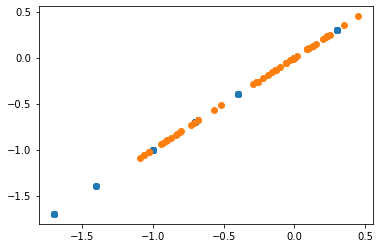

In [48]:
#7.15
u=np.random.randint(-1,1,50)
c=np.array([1,0.7,-0.3])
h=np.array([0.9,-0.5,0.5,-0.4,0.3,-0.3,0.2,-0.1])
y=np.convolve(c,u)
z=np.convolve(h,y)

import matplotlib.pyplot as plt
plt.ion()
plt.scatter(y,y)
plt.scatter(z,z)
plt.show()